In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Churn_Modelling.csv')

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


4) Descriptive statistics on the dataset

In [2]:
df.isnull().sum()

df.info()

df.columns

df.describe()

df.describe(include=['object'])

df['Geography'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Handle the Missing Values

Handle the Missing Values

Here there is no missing value

In [3]:
df['EstimatedSalary'].fillna(df.groupby(['HasCrCard'])['EstimatedSalary'].transform('mean'),inplace=True)

 Find the outliers and replace the outliers

Finding outliers


In [4]:
finding  maximum outliers
max_thresold=df['CreditScore'].quantile(0.90)
max_thresold

df[df['CreditScore']>max_thresold]

# Finding minimum outlier
min_thresold=df['CreditScore'].quantile(0.05)
min_thresold
df[df['CreditScore']<min_thresold]

# finding minimum and maximum in single way
min,max=df.CreditScore.quantile([0.001,0.999])
min, max

SyntaxError: ignored

In [5]:
# finding  maximum outliers
max_thresold=df['CreditScore'].quantile(0.90)
max_thresold

df[df['CreditScore']>max_thresold]

# Finding minimum outlier
min_thresold=df['CreditScore'].quantile(0.05)
min_thresold
df[df['CreditScore']<min_thresold]

# finding minimum and maximum in single way
min,max=df.CreditScore.quantile([0.001,0.999])
min, ma

(366.998, 850.0)

Removing Outliers

In [6]:
df2=df[(df.CreditScore<max)&(df.CreditScore>min)]
df2.shape

df2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


check Categorical columns and permorm encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
df.keys()

enc=OneHotEncoder(sparse=False)
code=enc.fit_transform(df[['NumOfProducts', 'HasCrCard',
       'IsActiveMember']])
code

pd.DataFrame(code,columns=['CreditScore', 
        'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9998,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


split the data into dependent and indepent variabled

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# convert object into int
df['Surname']=le.fit_transform(df['Surname'])
df['Geography']=le.fit_transform(df['Surname'])
df['Gender']=le.fit_transform(df['Surname'])

#split the data(independent and dependent)
# x and y are (independent and dependent)
x=df.iloc[:,0:13].values
y=df.iloc[:,12:13].values

y

array([[101348.88],
       [112542.58],
       [113931.57],
       ...,
       [ 42085.58],
       [ 92888.52],
       [ 38190.78]])

scale the independent variable

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()

scalling.fit_transform(df[['Age']])

# 2 method
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()

scalling.fit_transform(df[['Age']])

array([[ 0.29351742],
       [ 0.19816383],
       [ 0.29351742],
       ...,
       [-0.27860412],
       [ 0.29351742],
       [-1.04143285]])

split the data into trainig  and testing

In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=0)

xtrain.shape, xtest.shape

((7000, 13), (3000, 13))

perform visualizations

Univariate Analysis

1.We explore variables one by one

2.Method to perform uni-variate analysis will depend on whether the variable tpe is categorical(Nominal and order text) or continuous(sequence of number)

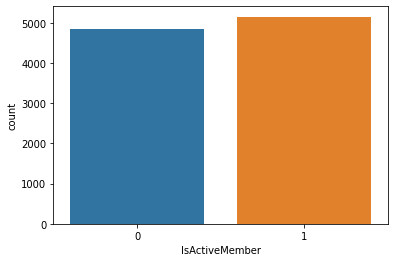

In [11]:
sns.countplot(data=df,x='IsActiveMember')

Bi- Variate Analysis

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


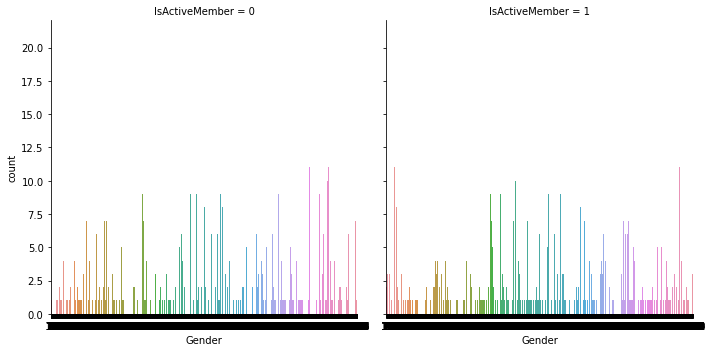

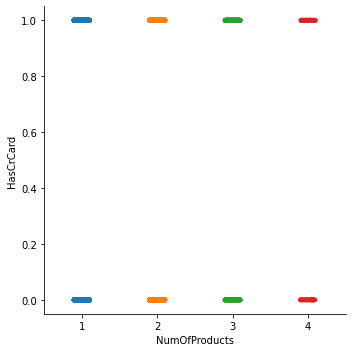

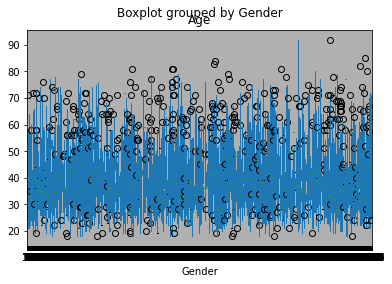

In [12]:
sns.catplot(x='Gender',col='IsActiveMember',kind='count', data=df)

sns.catplot(x='NumOfProducts',y='HasCrCard', data=df)

df.boxplot(column='Age',by='Gender')

Multi Variate Analysis

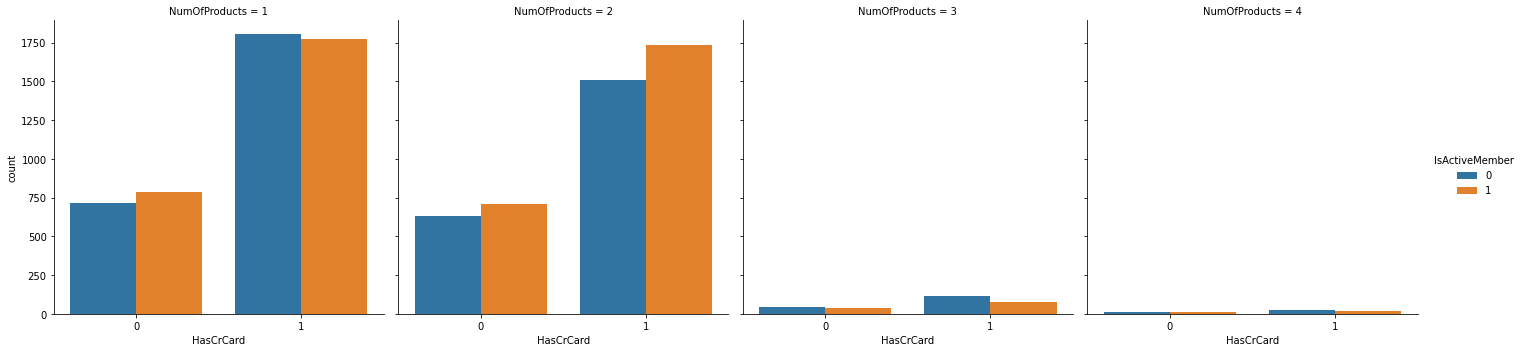

In [13]:
sns.catplot(data=df,col='NumOfProducts',x='HasCrCard',hue='IsActiveMember',kind='count')
